In [1]:
import numpy as np
import numpy.random as rand
from sklearn import datasets
import matplotlib.pyplot as plt

Strating Gradient Descent for 1000 iterations
Iteration 0 of 1000


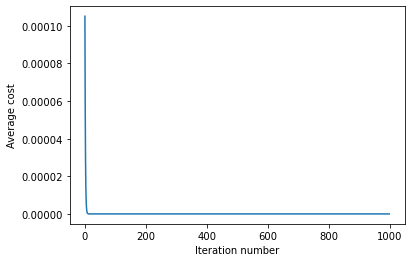

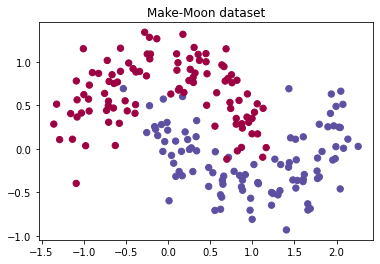

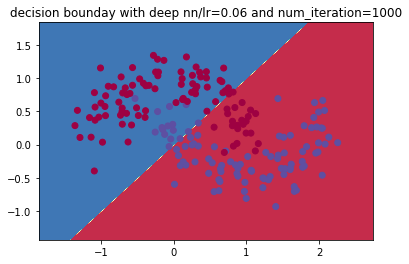

In [7]:
#the list of neurons in each layer and length of nn_size = number of layers in the network
nn_size = [2,8,16,2]

def generate_data():
    '''
    gererate training data
    :return: X as input data and y as the target data
    '''
    np.random.seed(0)
    X, y = datasets.make_moons(200, noise = 0.20)
    return X,y

def convert_y_to_vect(y):
    y_vect = np.zeros((len(y), 2))
    for i in range(len(y)):
        y_vect[i, y[i]] = 1
    return y_vect

def f(z):
    '''f returns sigmoid activation function'''
    return np.tanh(z)
def f_deriv(z):
    '''f_deriv returns the derivative of sigmoid activation function'''
    return 1 - (np.tanh(z))**2#f(z) * (1 - f(z))

def initial_weights_bias(nn_size):
    '''
    initialing the weight matrices and bias vectors
    '''
    W = {}
    b = {}
    for l in range(1, len(nn_size)):
        W[l] = rand.random_sample((nn_size[l], nn_size[l-1]))/ np.sqrt(nn_size[l-1])
        b[l] = rand.random_sample((nn_size[l],))
    return W, b


def initial_dW_db(nn_size):
    '''
    setting the values of dW and db to zero
    dW and db are the same size as the weight and bias matrices
    '''
    dW = {}
    db = {}
    for l in range(1, len(nn_size)):
        dW[l] = np.zeros((nn_size[l], nn_size[l-1]))
        db[l] = np.zeros((nn_size[l],))
    return dW, db

def feed_forward(x, W, b):
    '''
    :param x: Network input
    :param W: Netwrok weight
    :param b: Netwrok bias
    '''
    a = {1: x}
    z = {}
    for l in range(1, len(W) + 1):
        # if it is the first layer, then the input into the weights is x, 
        #otherwise, it is the output from the last layer
        if l == 1:
            node_input = x
        else: 
            node_input = a[l]
        z[l+1] = W[l].dot(node_input) + b[l] # z^(l+1) = W^(l)*a^(l) + b^(l)  
        a[l+1] = f(z[l + 1]) # a^(l) = f(z^(l)) 
    return a, z

def train(nn_size, X, y, learning_rate = 0.06, epochs = 1000, reg_lambda = 0.1):
    W, b = initial_weights_bias(nn_size)
    count = 0
    m = len(y) #number of examples
    avg_cost_func = []
    print('Strating Gradient Descent for {} iterations'.format(epochs))
    while count < epochs:
        if count%1000 == 0:
            print("Iteration {} of {}".format(count, epochs))
        dW, db = initial_dW_db(nn_size)
        avg_cost = 0
        for i in range(len(y)):
            delta = {}
            # perform the feed forward pass and return the stored a and z values, 
            # to be used in the gradient descent step
            a, z = feed_forward(X[i, :], W, b)
            #backpropagaton errors: runnig the loop from (nl -1) to 1
            for l in range(len(nn_size), 0, -1):
                if l == len(nn_size):
                    #output layer   
                    delta[l] = (y[i,:] - a[l]) # delta^(nl) = (y_i - a_i^(nl))
                    avg_cost = - sum(np.multiply(y[i, :], np.log(a[l]))) #cost = -sum(y.logy_hat)
                else:
                    if l>1: # hidden layers
                        delta[l] = np.dot(W[l].T, delta[l + 1]) * f_deriv(z[l]) # delta^(l) = (transpose(W^(l)) * delta^(l+1)) * f'(z^(l))
                        # dW^(l) = dW^(l) + delta^(l+1) * transpose(a^(l))
                        dW[l] += np.dot(delta[l+1][:,np.newaxis], np.transpose(a[l][:,np.newaxis]))                       
                        # db^(l) = db^(l) + delta^(l+1)
                        db[l] += delta[l+1]
                                                
        # perform the gradient descent step for the weights in each layer
        for l in range(len(nn_size) - 1, 0, -1):
            #Add deriativatives of regularization terms with the weights
            dW[l] += reg_lambda * W[l]      
            #Gradient descent parameter updata
            W[l] += -(1/m)*learning_rate * dW[l]
            b[l] += -(1/m)*learning_rate * db[l]
        # complete the average cost calculation
        avg_cost = 1.0/m * avg_cost
        avg_cost_func.append(avg_cost)
        count += 1
    return W, b, avg_cost_func

def convert_y_to_vect(y):
    y_vect = np.zeros((len(y), nn_size[-1]))
    for i in range(len(y)):
        y_vect[i, y[i]] = 1
    return y_vect   

#Training data
X, y = generate_data()
y_vect = convert_y_to_vect(y)
#Training returns the final weights, bias and the avg cost
W, b, avg_cost_func = train(nn_size, X, y_vect)

def predict(W, b, X):
    '''predicts the output with trained weights and bias'''
    m = len(X)
    y = np.zeros((m,))
    for i in range(m):
        a, z = feed_forward(X[i, :], W, b)
        y[i] = np.argmax(a[1], axis=0)     
    return y

pred = predict(W, b, X)

#plots the cost function
plt.figure()
plt.plot(avg_cost_func,'-')
plt.ylabel('Average cost')
plt.xlabel('Iteration number')
plt.show()

#plot training data
plt.figure()
plt.scatter(X[:, 0], X[:, 1], s=40, c = y, cmap=plt.cm.Spectral)
plt.title('Make-Moon dataset')
plt.show()

def plot_decision_boundary(pred_func, X, y):
    '''
    Plots the decision boundary
    :param pred_func: function used to predict the target data
    :param X: input data
    :param y: given target data
    :return: the graph of decision boundary
    '''
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), 
                         np.arange(y_min, y_max, h))
    r1, r2 = xx.flatten(), yy.flatten()
    r1,r2 = r1.reshape((len(r1), 1)), r2.reshape(len(r2),1)
    grid = np.hstack((r1, r2))

    # Predict the function value for the whole gid
    Z = predict(W, b, grid) 
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1],c = y, cmap=plt.cm.Spectral) 
    plt.title('decision bounday with deep nn/lr=0.06 and num_iteration=1000')
    
plot_decision_boundary(lambda x:predict(W, b, X), X, y )